![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("/Users/auroraxiao/Desktop/Data Science Project/DS-Projects/Data Set/crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


### Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

In [2]:
# Start coding here
# Use as many cells as you need


crimes["Hour"] = crimes["TIME OCC"].str[:2]

In [3]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,06
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,09


In [7]:
crimes["Hour"] = crimes["Hour"].astype('int')

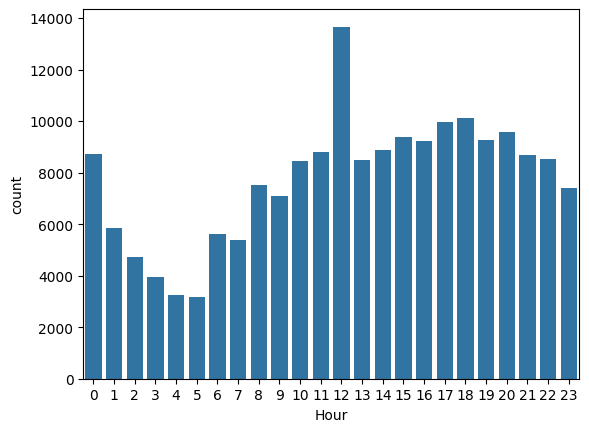

In [9]:
sns.countplot(data = crimes, x = "Hour")
plt.show()

In [10]:
peak_crime_hour = 12

### Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

In [11]:
crimes['TIME OCC'].describe()

count     185715
unique      1439
top         1200
freq        6462
Name: TIME OCC, dtype: object

In [12]:
crimes['TIME OCC'].min()

'0001'

In [13]:
crimes['TIME OCC'].max()

'2359'

In [24]:
crimes.dtypes

DR_NO            int64
Date Rptd       object
DATE OCC        object
TIME OCC        object
AREA NAME       object
Crm Cd Desc     object
Vict Age         int64
Vict Sex        object
Vict Descent    object
Weapon Desc     object
Status Desc     object
LOCATION        object
Hour             int64
dtype: object

In [25]:
crimes['TIME OCC'] = crimes['TIME OCC'].astype('int')

In [26]:
condition = (crimes['TIME OCC'] >= 2200) | (crimes['TIME OCC'] <= 359)
crime_hours_filtered = crimes[condition]

In [27]:
crime_hours_filtered.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour
8,231207476,2023-02-27,2020-08-15,1,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,1,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,1,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [28]:
crime_hours_filtered["TIME OCC"].max()

np.int64(2359)

In [29]:
crime_hours_filtered["TIME OCC"].min()

np.int64(1)

In [31]:
crime_hours_filtered['AREA NAME'].value_counts()

AREA NAME
Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Newton         2142
Olympic        2137
Pacific        1916
Rampart        1860
N Hollywood    1855
Wilshire       1716
Northeast      1684
Van Nuys       1629
West Valley    1520
Topanga        1461
Mission        1453
Harbor         1384
West LA        1369
Devonshire     1348
Hollenbeck     1315
Foothill       1260
Name: count, dtype: int64

In [32]:
peak_night_crime_location = 'Central'

### Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [34]:
max_value = crimes["Vict Age"].max()

In [42]:
age_label = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 17, 25, 34, 44, 54, 64,max_value ]
crimes["Age_Cut"] = pd.cut(crimes["Vict Age"], labels = age_label, bins = bins)

"The upper value of each bin is inclusive" - this means by default pd.cut() uses right=True, so the bins are like (0, 18], (18, 26], etc.

Why This Works
With right=True (the default), pd.cut() creates intervals like:

(0, 17] → includes 1-17, labeled "0-17"

(17, 25] → includes 18-25, labeled "18-25"

(25, 34] → includes 26-34, labeled "26-34"

(34, 44] → includes 35-44, labeled "35-44"

(44, 54] → includes 45-54, labeled "45-54"

(54, 64] → includes 55-64, labeled "55-64"

(64, max] → includes 65+, labeled "65+"

```
#### my previous code
age_label = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 18, 26, 35, 45, 55, 65,max_value ]
crimes["Age_Cut"] = pd.cut(crimes["Vict Age"], labels = age_label, bins = bins)
````

❌ WRONG
bins = [0, 18, 26, 35, 45, 55, 65, max_value]

Creates: (0, 18], (18, 26], (26, 35], ...

This means:
- Age 18 is in (0, 18] = labeled "0-17" ❌ Should be "18-25"

- Age 26 is in (18, 26] = labeled "18-25" ❌ Should be "26-34"

In [36]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour,Age_Cut
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9,65+


In [43]:
crimes["Age_Cut"].value_counts()

Age_Cut
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64

In [44]:
victim_ages = crimes["Age_Cut"].value_counts()

In [45]:
victim_ages

Age_Cut
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64

In [46]:
print(type(victim_ages))

<class 'pandas.core.series.Series'>
